In [1]:
# Metrics for classification
# Confusion Table (binary classifier, True or False)
# Scores: Acccuracy, Precision, Recall, F1 score
# Accuracy = (tp + tn)/(tp + tn + fp + fn)
# Precision = tp / (tp + fp)
# Recall = tp / (tp + fn)
# F1 score = (2 * Precision * Recall) / (Precision + Recall)

In [17]:
# k_NN classification metric (binary in this case)
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
jtplot.style(theme = 'oceans16')

In [18]:
# Load PIMA Indians dataset from github

url = 'https://gist.githubusercontent.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7/raw/3d35de839da708595a444187e9f13237b51a2cbe/pima-indians-diabetes.csv'
columns_name = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']
df = pd.read_csv(url, header = 0, names = columns_name )
df.loc[:,['triceps', 'insulin']] = df.loc[:,['triceps', 'insulin']].astype('float64')

# Set X (data) and y (target)
X = df.drop ('diabetes', axis = 1)
y = df['diabetes']

In [23]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Instantiate a k-NN classifier: knn with k = 6
knn = KNeighborsClassifier(n_neighbors = 6)

#  Fit with train
knn.fit(X_train, y_train)

# Predict with test
y_pred = knn.predict(X_test)

# Generate the confution matrix and classification report, notice the argment order
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



In [20]:
#-----------------------------------------splitting from above---------------------------------------#
#----------------------------------------------------------------------------------------------------#
#-----------------------------------------Logistic regression----------------------------------------#

In [26]:
# Logistic regression is for classification problem, not regression problem
# ROC curve (false positive rate and true positive rate)
# import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier (instantiate)
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Looks better than k_nn

[[175  31]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.68      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



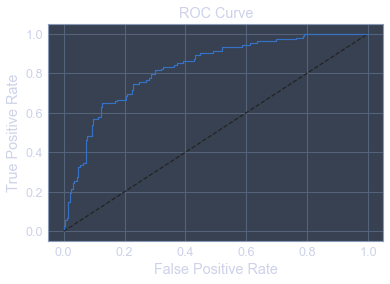

In [62]:
# Plotting an ROC curve
# ROC curve describes how fpr and tpr change with threshold change
# import
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob, 这个是把 概率 返回出来，而最终结果（0,1）是根据这个概率来判断的，比如大于0.5 就是0 (False)，小于0.5 就是1(True)， 取决于 threshold
# y_pred_prob 有两列，第一列是判断 为0的概率，第二列是判断为1的概率，同一行上两列加起来应该等于1, 这里只取第二列
y_pred_prob = logreg.predict_proba(X_test)[:,1] 

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve (y_test, y_pred_prob)
# 随着 threshold 值的降低（1 to 0）， fpr 和 tpr 的值都会趋近于1 
# tpr = recall (or sensitivity) = tp/(tp + fn)
# fpr = fp / (fp + tn)
# threshold = 0 时， model predicts '1' (true) for all the data, 因为阈值太低，所有预测数据都是positive, 所以在预测值里没有 negative, 所以 fn 和 tn 都为 0
# threshold = 1 时， model predicts '0' (false) for all the data， 因为阈值太高，所有预测数据都是negative， tp 和 fp 都为0

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 理论上最好的点是在 (0,1) 如果能达到这一点，就是 perfect classification
# 这个曲线可以用来评价这个模型，AUC (area under the curver) 最好能达到1，最不好就是0.5(图中虚线)，此时啥也预测不了
# 从这张图来看，模型表现不是太好

In [65]:
# AUC computation
# The larger AUC, the better the model
# import
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# Compute and print AUC score, using previous values
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores:
cv_auc = cross_val_score (logreg, X, y, cv = 5, scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8266228821625738
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]
